## Multiple Dimension Input

### Step 1: Read multi-dim data from .csv:

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset
xy = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵

print(f"xdata is: {x_data}")
print(f"ydata is: {y_data}")

xdata is: tensor([[-0.2941,  0.4874,  0.1803,  ...,  0.0015, -0.5312, -0.0333],
        [-0.8824, -0.1457,  0.0820,  ..., -0.2072, -0.7669, -0.6667],
        [-0.0588,  0.8392,  0.0492,  ..., -0.3055, -0.4927, -0.6333],
        ...,
        [-0.4118,  0.2161,  0.1803,  ..., -0.2191, -0.8574, -0.7000],
        [-0.8824,  0.2663, -0.0164,  ..., -0.1028, -0.7686, -0.1333],
        [-0.8824, -0.0653,  0.1475,  ..., -0.0939, -0.7976, -0.9333]])
ydata is: tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],


### Step 2: Define the model:

In [10]:
# design model using class
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6) # 输入数据x的特征是8维，x有8个特征
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
        return x
 
 
model = Model()

### Step 3: Define the loss function and optimizer:

In [11]:
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
 
epoch_list = []
loss_list = []

### Step 4: Training:

In [12]:
# training cycle forward, backward, update
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print('Epoch: ', epoch, '\t Loss: ', loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.item())
 
    optimizer.zero_grad()
    loss.backward()
 
    optimizer.step()

Epoch:  0 	 Loss:  0.648396909236908
Epoch:  1 	 Loss:  0.648064911365509
Epoch:  2 	 Loss:  0.6477687358856201
Epoch:  3 	 Loss:  0.6475043296813965
Epoch:  4 	 Loss:  0.6472683548927307
Epoch:  5 	 Loss:  0.6470577120780945
Epoch:  6 	 Loss:  0.6468695402145386
Epoch:  7 	 Loss:  0.6467015147209167
Epoch:  8 	 Loss:  0.6465514302253723
Epoch:  9 	 Loss:  0.6464173197746277
Epoch:  10 	 Loss:  0.6462973952293396
Epoch:  11 	 Loss:  0.6461901664733887
Epoch:  12 	 Loss:  0.6460943818092346
Epoch:  13 	 Loss:  0.6460087299346924
Epoch:  14 	 Loss:  0.645932137966156
Epoch:  15 	 Loss:  0.6458635926246643
Epoch:  16 	 Loss:  0.6458023190498352
Epoch:  17 	 Loss:  0.6457473635673523
Epoch:  18 	 Loss:  0.6456982493400574
Epoch:  19 	 Loss:  0.6456542611122131
Epoch:  20 	 Loss:  0.6456148624420166
Epoch:  21 	 Loss:  0.6455795764923096
Epoch:  22 	 Loss:  0.6455480456352234
Epoch:  23 	 Loss:  0.6455196142196655
Epoch:  24 	 Loss:  0.645494282245636
Epoch:  25 	 Loss:  0.6454715728759766


### Step 5: Plotting the result:

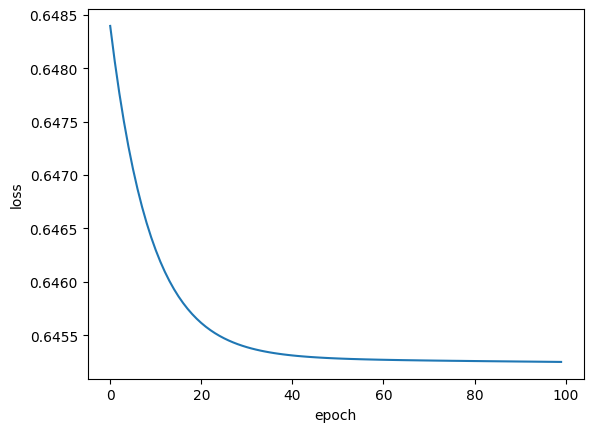

In [13]:
plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()